In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from io import BytesIO
import tensorflow as tf

/usr/local/envs/py2env/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
%%bash
pip install gcsfs

  Running setup.py bdist_wheel for gcsfs: started
  Running setup.py bdist_wheel for gcsfs: finished with status 'done'
  Stored in directory: /content/.cache/pip/wheels/58/b5/19/7b0e8a870ef16e1c0b8eee819c511c789be5cde308e59f2752
Successfully built gcsfs


In [5]:
import gcsfs

In [6]:
fs = gcsfs.GCSFileSystem(project='buoyant-yew-223720 ')

In [12]:
fs.ls('buoyant-yew-223720/TestFiles/')

[u'buoyant-yew-223720/TestFiles/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_0_45.jpeg',
 u'buoyant-yew-223720/TestFiles/Tox21_2_32.csv',
 u'buoyant-yew-223720/TestFiles/']

In [9]:
with fs.open('buoyant-yew-223720/TestFiles/Tox21_2_32.csv', 'rb') as f:
  df_1 = pd.read_csv(f)

In [3]:
from tensorflow.python.lib.io import file_io
with file_io.FileIO('gs://buoyant-yew-223720/TestFiles/Tox21_2_32.csv', 'r') as f:
  df_2 = pd.read_csv(f)

In [4]:
df_1.head(2)

NameError: name 'df_1' is not defined

In [5]:
df_2.head(2)

,ID,OPT,LR,MOM,ACT,ACT_LAST,EPOCHS,BATCHSIZE,NLAYERS,NDENSE,...,AUC_ROC,SENS,SPEC,BACC,AGG_BACC,SD_BACC,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1540573064_4151793,Adadelta,1,0.95,relu,softmax,250,16,3,100,...,0.710888,0.643872,0.659341,0.651607,0.65613,0.014834,NaN,NaN,MAX,MIN
1,1540586701_7936087,Adadelta,1,0.95,relu,softmax,250,16,3,100,...,0.745128,0.646528,0.709617,0.678073,NaN,NaN,NaN,NaN,0.7016753668,0.596950844


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


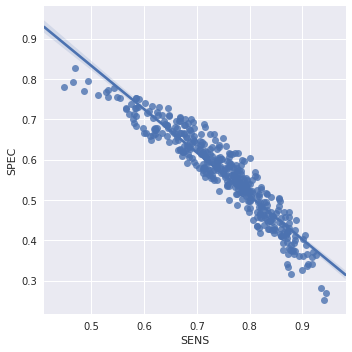

In [19]:
sns.lmplot("SENS", "SPEC", data=df_1)